# 

Learning Objectives:

- Explain supervised learning and how it can be applied to regression and classification problems
- Apply K-Nearest Neighbor (KNN) algorithm for classification
- Apply Intel® Extension for Scikit-learn* to leverage underlying compute capabilities of hardware



# scikit-learn* 

Frameworks provide structure that Data Scientists use to build code. Frameworks are more than just libraries, because in addition to callable code, frameworks influence how code is written. 

A main virtue of using an optimized framework is that code runs faster. Code that runs faster is just generally more convenient but when we begin looking at applied data science and AI models, we can see more material benefits. Here you will see how optimization, particularly hyperparameter optimization can benefit more than just speed. 

These exercises will demonstrate how to apply **the Intel® Extension for Scikit-learn*,** a seamless way to speed up your Scikit-learn application. The acceleration is achieved through the use of the Intel® oneAPI Data Analytics Library (oneDAL). Patching is the term used to extend scikit-learn with Intel optimizations and makes it a well-suited machine learning framework for dealing with real-life problems. 

To get optimized versions of many Scikit-learn algorithms using a patch() approach consisting of adding these lines of code Prior to importing sklearn: 

- **from sklearnex import patch_sklearn**
- **patch_sklearn()**

## This exercise relies on installation of  Intel® Extension for Scikit-learn*

If you have not already done so, follow the instructions from Week 1 for instructions

In [12]:
from __future__ import print_function
import os
data_path = ['../Datasets']

# from sklearnex import patch_sklearn
# patch_sklearn()  

from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier


## Question 1

* Begin by importing the data. Examine the columns and data.
* Notice that the data contains a state, area code, and phone number. Do you think these are good features to use when building a machine learning model? Why or why not? 

We will not be using them, so they can be dropped from the data.

In [13]:
import pandas as pd

df = pd.read_csv("us-500.csv") 

print(df.head())

print(df.info())

  first_name last_name            company_name               address  \
0      James      Butt       Benton, John B Jr    6649 N Blue Gum St   
1  Josephine   Darakjy   Chanay, Jeffrey A Esq   4 B Blue Ridge Blvd   
2        Art    Venere     Chemel, James L Cpa  8 W Cerritos Ave #54   
3      Lenna  Paprocki  Feltz Printing Service           639 Main St   
4    Donette    Foller     Printing Dimensions          34 Center St   

          city      county state    zip        phone1        phone2  \
0  New Orleans     Orleans    LA  70116  504-621-8927  504-845-1427   
1     Brighton  Livingston    MI  48116  810-292-9388  810-374-9840   
2   Bridgeport  Gloucester    NJ   8014  856-636-8749  856-264-4130   
3    Anchorage   Anchorage    AK  99501  907-385-4412  907-921-2010   
4     Hamilton      Butler    OH  45011  513-570-1893  513-549-4561   

                           email                                  web  
0                jbutt@gmail.com         http://www.bentonjohnbjr.co

In [14]:
df = df.drop(columns=["state", "address", "phone2"])

print(df.head())

  first_name last_name            company_name         city      county  \
0      James      Butt       Benton, John B Jr  New Orleans     Orleans   
1  Josephine   Darakjy   Chanay, Jeffrey A Esq     Brighton  Livingston   
2        Art    Venere     Chemel, James L Cpa   Bridgeport  Gloucester   
3      Lenna  Paprocki  Feltz Printing Service    Anchorage   Anchorage   
4    Donette    Foller     Printing Dimensions     Hamilton      Butler   

     zip        phone1                          email  \
0  70116  504-621-8927                jbutt@gmail.com   
1  48116  810-292-9388  josephine_darakjy@darakjy.org   
2   8014  856-636-8749                 art@venere.org   
3  99501  907-385-4412          lpaprocki@hotmail.com   
4  45011  513-570-1893         donette.foller@cox.net   

                                   web  
0         http://www.bentonjohnbjr.com  
1     http://www.chanayjeffreyaesq.com  
2       http://www.chemeljameslcpa.com  
3  http://www.feltzprintingservice.com  
4

## Question 2

* Notice that some of the columns are categorical data and some are floats. These features will need to be numerically encoded using one of the methods from the lecture.
* Finally, remember from the lecture that K-nearest neighbors requires scaled data. Scale the data using one of the scaling methods discussed in the lecture.

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load your dataset (replace 'your_data.csv' with your actual file)
df = pd.read_csv('us-500.csv')

# Clean your data (example cleaning steps)
df_cleaned = df.dropna()  # Remove missing values
df_cleaned = df_cleaned.drop_duplicates()  # Remove duplicates

# Encode categorical features
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col].astype(str))  # Handle potential mixed types
    label_encoders[col] = le

# Scale numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)
df_scaled = pd.DataFrame(scaled_data, columns=df_cleaned.columns)

# Show results
print("\nScaled Data (First 5 rows):")
print(df_scaled.head())


Scaled Data (First 5 rows):
   first_name  last_name  company_name   address      city    county  \
0   -0.237882  -1.340610     -1.430677  0.509224  0.346543  0.566206   
1   -0.071581  -1.063481     -1.098122 -0.453798 -1.287996  0.016560   
2   -1.524903   1.493031     -1.077338  1.077338 -1.308686 -0.515354   
3    0.268250   0.613147     -0.661645  0.439942 -1.629387 -1.756489   
4   -0.852471  -0.758640      0.772496 -0.723999 -0.460381 -1.348688   

      state       zip    phone1    phone2     email       web  
0 -0.450590  0.688866 -0.301377 -0.294449 -0.218239 -1.437605  
1 -0.165947  0.018868  0.938773  0.938773 -0.065818 -1.118907  
2  0.474500 -1.202416  1.139692  1.118907 -1.513815 -1.098122  
3 -1.589163  1.583769  1.215902  1.243615  0.439942 -0.668573  
4  0.759144 -0.075693 -0.107387 -0.107387 -0.862563  0.765568  


## Question 3

* Separate the feature columns (everything except `churned`) from the label (`churned`). This will create two tables.
* Fit a K-nearest neighbors model with a value of `k=3` to this data and predict the outcome on the same data.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = df_scaled.drop(columns=["city"]) 
y = df_cleaned["city"] 

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

y_pred = knn.predict(X)

accuracy = accuracy_score(y, y_pred)

print("\nPredicted Labels (First 10):", y_pred[:10])
print("Model Accuracy on Training Data:", accuracy)


Predicted Labels (First 10): [141  41  39   1 121  13  62 199 188  19]
Model Accuracy on Training Data: 0.37


## Question 4

Ways to measure error haven't been discussed in class yet, but accuracy is an easy one to understand--it is simply the percent of labels that were correctly predicted (either true or false). 

* Write a function to calculate accuracy using the actual and predicted labels.
* Using the function, calculate the accuracy of this K-nearest neighbors model on the data.

In [18]:
def calculate_accuracy(y_true, y_pred):
 
    correct = sum(y_true == y_pred) 
    total = len(y_true)  
    return correct / total * 100  

accuracy = calculate_accuracy(y, y_pred)

print(f"Model Accuracy: {accuracy:.2f}%")


Model Accuracy: 37.00%


## Question 5

* Fit the K-nearest neighbors model again with `n_neighbors=3` but this time use distance for the weights. Calculate the accuracy using the function you created above. 
* Fit another K-nearest neighbors model. This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (`p=1`) i.e. Manhattan Distance.

When weighted distances are used for part 1 of this question, a value of 1.0 should be returned for the accuracy. Why do you think this is? *Hint:* we are predicting on the data and with KNN the model *is* the data. We will learn how to avoid this pitfall in the next lecture.

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn_distance = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_distance.fit(X, y)
y_pred_distance = knn_distance.predict(X)

accuracy_distance = calculate_accuracy(y, y_pred_distance)
print(f"Accuracy with Distance Weights: {accuracy_distance:.2f}%")

knn_manhattan = KNeighborsClassifier(n_neighbors=3, weights='uniform', p=1)
knn_manhattan.fit(X, y)
y_pred_manhattan = knn_manhattan.predict(X)

accuracy_manhattan = calculate_accuracy(y, y_pred_manhattan)
print(f"Accuracy with Manhattan Distance: {accuracy_manhattan:.2f}%")


Accuracy with Distance Weights: 100.00%
Accuracy with Manhattan Distance: 43.40%


## Question 6

* Fit a K-nearest neighbors model using values of `k` (`n_neighbors`) ranging from 1 to 20. Use uniform weights (the default). The coefficient for the Minkowski distance (`p`) can be set to either 1 or 2--just be consistent. Store the accuracy and the value of `k` used from each of these fits in a list or dictionary.
* Plot (or view the table of) the `accuracy` vs `k`. What do you notice happens when `k=1`? Why do you think this is? *Hint:* it's for the same reason discussed above.

In [20]:
!pip install intel-tensorflow

In [21]:
!pip install scikit-learn-intelex

ERROR: Could not find a version that satisfies the requirement scikit-learn-intelex (from versions: none)
ERROR: No matching distribution found for scikit-learn-intelex


In [22]:
!pip install daal4py

ERROR: Could not find a version that satisfies the requirement daal4py (from versions: none)
ERROR: No matching distribution found for daal4py


In [23]:
from sklearnex import patch_sklearn
patch_sklearn()

ModuleNotFoundError: No module named 'sklearnex'

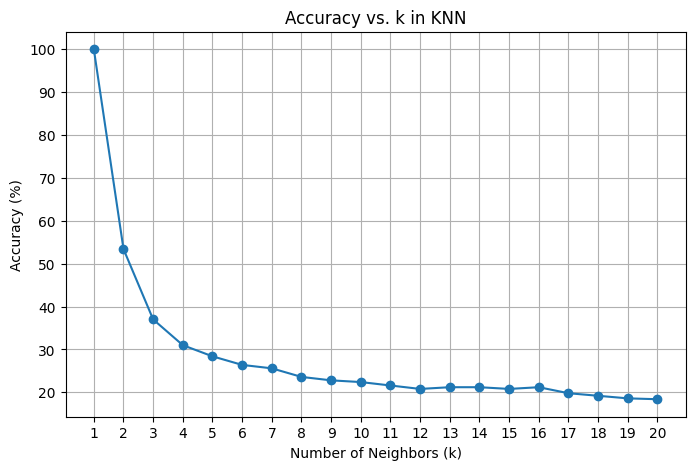

     k  Accuracy
0    1     100.0
1    2      53.4
2    3      37.0
3    4      31.0
4    5      28.4
5    6      26.4
6    7      25.6
7    8      23.6
8    9      22.8
9   10      22.4
10  11      21.6
11  12      20.8
12  13      21.2
13  14      21.2
14  15      20.8
15  16      21.2
16  17      19.8
17  18      19.2
18  19      18.6
19  20      18.4


In [24]:
import matplotlib.pyplot as plt

accuracy_results = {}

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', p=2)  
    knn.fit(X, y)
    y_pred = knn.predict(X)

    accuracy = calculate_accuracy(y, y_pred)

    accuracy_results[k] = accuracy

accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['k', 'Accuracy'])

plt.figure(figsize=(8, 5))
plt.plot(accuracy_df['k'], accuracy_df['Accuracy'], marker='o', linestyle='-')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs. k in KNN")
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

print(accuracy_df)